In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/divar_dataset/divar_posts_dataset.csv')
df.isnull().sum()

Unnamed: 0              0
archive_by_user         0
brand              756743
cat1                    0
cat2                 1758
cat3               172334
city                    0
created_at              0
desc                    0
id                      0
image_count             0
mileage            827184
platform                0
price                   0
title                   0
type               849106
year               827184
dtype: int64

In [ ]:
df.dropna(subset=['city', 'cat3'], inplace=True)
df.isnull().sum()

Unnamed: 0              0
archive_by_user         0
brand              584409
cat1                    0
cat2                    0
cat3                    0
city                    0
created_at              0
desc                    0
id                      0
image_count             0
mileage            654850
platform                0
price                   0
title                   0
type               688205
year               654850
dtype: int64

In [ ]:
df['pname'] =  df['cat3']
df.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year,pname
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN,sofa-armchair
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN,antiques-and-art
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN,heavy
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN,sofa-armchair
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN,personal-toys


In [ ]:
len(df['pname'].unique())

66

In [ ]:
tempdf = pd.get_dummies(df['pname'])
tempdf

,accessories,antiques-and-art,ball-sports,barbershop-and-beautysalon,bathroom-wc-sauna,beds-bedroom,birds,cafe-and-restaurant,camera-camcoders,camping-outdoor,carpets,cat,child-car-seat,childrens-furniture,clothing,coin-stamp,cookware-tableware,desktops,dishwasher,drums-percussion,educational,farm-animals,fish,fridge-and-freezer,garden-and-patio,guitar-bass-amplifier,heavy,historical-objects,industrial,instrument-cleaning-tailoring,jewelry,kitchen,laptops,light,lighting,microwave-stove,mobile-phones,mobile-tablet-accessories,modem-and-network-equipment,mp3-player,offices,parts-and-accessories,personal-toys,piano-keyboard,printer-scaner-copier,repair-tool,rhinestones,rodents-rabbits,shoes-belt-bag,shop-and-cash,sofa-armchair,stereo-surround,storage,stove-and-heating,strollers-and-accessories,tables-and-chairs,tablet,textile-ornaments,traditional,training,tv-and-stereo-furniture,tv-projector,video-dvdplayer,washer-dryer,watches,winter-sports
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
947631,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
947632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
947633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tempdf['city'] = df['city']
tempdf.head()

,accessories,antiques-and-art,ball-sports,barbershop-and-beautysalon,bathroom-wc-sauna,beds-bedroom,birds,cafe-and-restaurant,camera-camcoders,camping-outdoor,carpets,cat,child-car-seat,childrens-furniture,clothing,coin-stamp,cookware-tableware,desktops,dishwasher,drums-percussion,educational,farm-animals,fish,fridge-and-freezer,garden-and-patio,guitar-bass-amplifier,heavy,historical-objects,industrial,instrument-cleaning-tailoring,jewelry,kitchen,laptops,light,lighting,microwave-stove,mobile-phones,mobile-tablet-accessories,modem-and-network-equipment,mp3-player,offices,parts-and-accessories,personal-toys,piano-keyboard,printer-scaner-copier,repair-tool,rhinestones,rodents-rabbits,shoes-belt-bag,shop-and-cash,sofa-armchair,stereo-surround,storage,stove-and-heating,strollers-and-accessories,tables-and-chairs,tablet,textile-ornaments,traditional,training,tv-and-stereo-furniture,tv-projector,video-dvdplayer,washer-dryer,watches,winter-sports,city
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tehran
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mashhad
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mashhad
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tehran
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Karaj


In [ ]:
# len(tempdf.columns)
cols = list(tempdf.columns)
tempdf = tempdf[[cols[-1]] + cols[0:-1]]
tempdf.head()

,city,accessories,antiques-and-art,ball-sports,barbershop-and-beautysalon,bathroom-wc-sauna,beds-bedroom,birds,cafe-and-restaurant,camera-camcoders,camping-outdoor,carpets,cat,child-car-seat,childrens-furniture,clothing,coin-stamp,cookware-tableware,desktops,dishwasher,drums-percussion,educational,farm-animals,fish,fridge-and-freezer,garden-and-patio,guitar-bass-amplifier,heavy,historical-objects,industrial,instrument-cleaning-tailoring,jewelry,kitchen,laptops,light,lighting,microwave-stove,mobile-phones,mobile-tablet-accessories,modem-and-network-equipment,mp3-player,offices,parts-and-accessories,personal-toys,piano-keyboard,printer-scaner-copier,repair-tool,rhinestones,rodents-rabbits,shoes-belt-bag,shop-and-cash,sofa-armchair,stereo-surround,storage,stove-and-heating,strollers-and-accessories,tables-and-chairs,tablet,textile-ornaments,traditional,training,tv-and-stereo-furniture,tv-projector,video-dvdplayer,washer-dryer,watches,winter-sports
0,Tehran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mashhad,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mashhad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Tehran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Karaj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
mydf = tempdf.groupby(['city'], as_index=False).sum()
mydf

,city,accessories,antiques-and-art,ball-sports,barbershop-and-beautysalon,bathroom-wc-sauna,beds-bedroom,birds,cafe-and-restaurant,camera-camcoders,camping-outdoor,carpets,cat,child-car-seat,childrens-furniture,clothing,coin-stamp,cookware-tableware,desktops,dishwasher,drums-percussion,educational,farm-animals,fish,fridge-and-freezer,garden-and-patio,guitar-bass-amplifier,heavy,historical-objects,industrial,instrument-cleaning-tailoring,jewelry,kitchen,laptops,light,lighting,microwave-stove,mobile-phones,mobile-tablet-accessories,modem-and-network-equipment,mp3-player,offices,parts-and-accessories,personal-toys,piano-keyboard,printer-scaner-copier,repair-tool,rhinestones,rodents-rabbits,shoes-belt-bag,shop-and-cash,sofa-armchair,stereo-surround,storage,stove-and-heating,strollers-and-accessories,tables-and-chairs,tablet,textile-ornaments,traditional,training,tv-and-stereo-furniture,tv-projector,video-dvdplayer,washer-dryer,watches,winter-sports
0,Ahvaz,0.0,1032.0,0.0,0.0,0.0,1126.0,2391.0,0.0,0.0,0.0,1674.0,0.0,0.0,670.0,1873.0,0.0,1110.0,395.0,0.0,0.0,0.0,0.0,0.0,838.0,0.0,0.0,820.0,0.0,876.0,464.0,395.0,385.0,0.0,4879.0,0.0,359.0,4296.0,543.0,491.0,0.0,0.0,671.0,0.0,0.0,0.0,0.0,0.0,0.0,1345.0,978.0,2452.0,0.0,1383.0,1454.0,0.0,2032.0,0.0,554.0,0.0,435.0,1254.0,1100.0,0.0,339.0,0.0,0.0
1,Isfahan,692.0,1390.0,0.0,0.0,0.0,955.0,5214.0,611.0,359.0,0.0,1054.0,0.0,0.0,521.0,2159.0,0.0,1025.0,350.0,0.0,0.0,0.0,587.0,0.0,779.0,0.0,0.0,1167.0,0.0,1825.0,482.0,0.0,0.0,0.0,8773.0,461.0,426.0,5021.0,872.0,376.0,0.0,325.0,750.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.0,1434.0,3305.0,389.0,1424.0,892.0,0.0,1825.0,387.0,0.0,0.0,532.0,683.0,1114.0,0.0,395.0,411.0,0.0
2,Karaj,619.0,2449.0,0.0,447.0,0.0,1547.0,2267.0,615.0,486.0,0.0,2034.0,0.0,0.0,1220.0,4520.0,0.0,2150.0,502.0,0.0,0.0,0.0,422.0,0.0,1224.0,0.0,0.0,484.0,0.0,1685.0,744.0,0.0,509.0,405.0,11057.0,797.0,750.0,5443.0,658.0,428.0,0.0,547.0,846.0,529.0,0.0,375.0,0.0,0.0,0.0,2839.0,2048.0,5259.0,745.0,2936.0,952.0,408.0,3130.0,421.0,841.0,0.0,680.0,1366.0,1610.0,0.0,524.0,693.0,0.0
3,Kermanshah,0.0,768.0,0.0,0.0,0.0,395.0,779.0,0.0,0.0,0.0,934.0,0.0,0.0,0.0,2181.0,0.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,726.0,0.0,572.0,0.0,0.0,0.0,0.0,2277.0,0.0,0.0,2582.0,374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1474.0,643.0,1342.0,0.0,564.0,0.0,0.0,837.0,0.0,0.0,0.0,0.0,483.0,496.0,0.0,0.0,0.0,0.0
4,Mashhad,1045.0,4212.0,0.0,502.0,0.0,2152.0,10006.0,565.0,589.0,0.0,2625.0,0.0,0.0,1463.0,11058.0,0.0,3640.0,699.0,0.0,0.0,801.0,757.0,439.0,1567.0,471.0,0.0,926.0,398.0,2169.0,1259.0,582.0,588.0,681.0,15088.0,852.0,872.0,9560.0,1505.0,563.0,0.0,639.0,1564.0,930.0,0.0,414.0,0.0,0.0,0.0,5072.0,2876.0,5786.0,816.0,4126.0,2061.0,578.0,3936.0,621.0,1261.0,0.0,871.0,2196.0,2356.0,0.0,844.0,741.0,0.0
5,Qom,372.0,942.0,0.0,0.0,0.0,525.0,2904.0,0.0,0.0,0.0,876.0,0.0,0.0,378.0,3102.0,0.0,928.0,0.0,0.0,0.0,445.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,695.0,359.0,0.0,0.0,0.0,1683.0,0.0,0.0,2925.0,541.0,0.0,0.0,0.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,719.0,1232.0,0.0,1255.0,524.0,0.0,1035.0,0.0,0.0,0.0,0.0,482.0,604.0,0.0,0.0,0.0,0.0
6,Shiraz,674.0,1394.0,0.0,0.0,0.0,1286.0,5115.0,431.0,586.0,0.0,1507.0,0.0,0.0,800.0,2787.0,0.0,1150.0,544.0,0.0,0.0,431.0,641.0,0.0,1279.0,0.0,0.0,1728.0,0.0,1830.0,531.0,390.0,371.0,370.0,18344.0,0.0,521.0,5771.0,810.0,450.0,0.0,339.0,847.0,485.0,0.0,413.0,0.0,0.0,0.0,1938.0,1580.0,3645.0,432.0,1145.0,1026.0,378.0,2309.0,459.0,0.0,0.0,628.0,1012.0,1576.0,0.0,579.0,516.0,0.0
7,Tabriz,0.0,1337.0,0.0,0.0,0.0,448.0,1065.0,0.0,0.0,0.0,1289.0,0.0,0.0,0.0,2640.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,378.0,0.0,0.0,615.0,0.0,1356.0,0.0,0.0,0.0,0.0,4421.0,0.0,0.0,3491.0,625.0,0.0,0.0,0.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,1658.0,776.0,1403.0,0.0,841.0,604.0,0.0,920.0,0.0,0.0,0.0,378.0,551.0,658.0,0.0,0.0,370.0,0.0
8,Tehran,2569.0,15533.0,779.0,2168.0,1122.0,8216.0,8770.0,2448.0,3127.0,659.0,10479.0,472.0,1084.0,5746.0,23438.0,388.0,13290.0,2208.0,1143.0,354.0,1526.0,1130.0,782.0,5087.0,769.0,1407.0,3526.0,1298.

In [ ]:
strd = normalize(mydf.iloc[:, 1:])

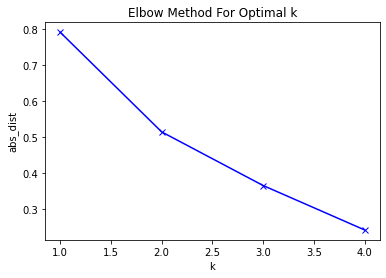

In [ ]:
abs_dist = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=50)
    km = km.fit(strd)
    abs_dist.append(km.inertia_)

plt.plot(K, abs_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('abs_dist')
plt.title('Elbow Method For Optimal k')
plt.show()

**k = 2**

In [ ]:
realK = 2
model = KMeans(n_clusters=realK, init='k-means++', max_iter=150, n_init=50)
model.fit(strd)
labels=model.labels_

mydf['cluster'] = labels
mydf.head()

,city,accessories,antiques-and-art,ball-sports,barbershop-and-beautysalon,bathroom-wc-sauna,beds-bedroom,birds,cafe-and-restaurant,camera-camcoders,camping-outdoor,carpets,cat,child-car-seat,childrens-furniture,clothing,coin-stamp,cookware-tableware,desktops,dishwasher,drums-percussion,educational,farm-animals,fish,fridge-and-freezer,garden-and-patio,guitar-bass-amplifier,heavy,historical-objects,industrial,instrument-cleaning-tailoring,jewelry,kitchen,laptops,light,lighting,microwave-stove,mobile-phones,mobile-tablet-accessories,modem-and-network-equipment,mp3-player,offices,parts-and-accessories,personal-toys,piano-keyboard,printer-scaner-copier,repair-tool,rhinestones,rodents-rabbits,shoes-belt-bag,shop-and-cash,sofa-armchair,stereo-surround,storage,stove-and-heating,strollers-and-accessories,tables-and-chairs,tablet,textile-ornaments,traditional,training,tv-and-stereo-furniture,tv-projector,video-dvdplayer,washer-dryer,watches,winter-sports,cluster
0,Ahvaz,0.0,1032.0,0.0,0.0,0.0,1126.0,2391.0,0.0,0.0,0.0,1674.0,0.0,0.0,670.0,1873.0,0.0,1110.0,395.0,0.0,0.0,0.0,0.0,0.0,838.0,0.0,0.0,820.0,0.0,876.0,464.0,395.0,385.0,0.0,4879.0,0.0,359.0,4296.0,543.0,491.0,0.0,0.0,671.0,0.0,0.0,0.0,0.0,0.0,0.0,1345.0,978.0,2452.0,0.0,1383.0,1454.0,0.0,2032.0,0.0,554.0,0.0,435.0,1254.0,1100.0,0.0,339.0,0.0,0.0,0
1,Isfahan,692.0,1390.0,0.0,0.0,0.0,955.0,5214.0,611.0,359.0,0.0,1054.0,0.0,0.0,521.0,2159.0,0.0,1025.0,350.0,0.0,0.0,0.0,587.0,0.0,779.0,0.0,0.0,1167.0,0.0,1825.0,482.0,0.0,0.0,0.0,8773.0,461.0,426.0,5021.0,872.0,376.0,0.0,325.0,750.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.0,1434.0,3305.0,389.0,1424.0,892.0,0.0,1825.0,387.0,0.0,0.0,532.0,683.0,1114.0,0.0,395.0,411.0,0.0,1
2,Karaj,619.0,2449.0,0.0,447.0,0.0,1547.0,2267.0,615.0,486.0,0.0,2034.0,0.0,0.0,1220.0,4520.0,0.0,2150.0,502.0,0.0,0.0,0.0,422.0,0.0,1224.0,0.0,0.0,484.0,0.0,1685.0,744.0,0.0,509.0,405.0,11057.0,797.0,750.0,5443.0,658.0,428.0,0.0,547.0,846.0,529.0,0.0,375.0,0.0,0.0,0.0,2839.0,2048.0,5259.0,745.0,2936.0,952.0,408.0,3130.0,421.0,841.0,0.0,680.0,1366.0,1610.0,0.0,524.0,693.0,0.0,1
3,Kermanshah,0.0,768.0,0.0,0.0,0.0,395.0,779.0,0.0,0.0,0.0,934.0,0.0,0.0,0.0,2181.0,0.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,726.0,0.0,572.0,0.0,0.0,0.0,0.0,2277.0,0.0,0.0,2582.0,374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1474.0,643.0,1342.0,0.0,564.0,0.0,0.0,837.0,0.0,0.0,0.0,0.0,483.0,496.0,0.0,0.0,0.0,0.0,0
4,Mashhad,1045.0,4212.0,0.0,502.0,0.0,2152.0,10006.0,565.0,589.0,0.0,2625.0,0.0,0.0,1463.0,11058.0,0.0,3640.0,699.0,0.0,0.0,801.0,757.0,439.0,1567.0,471.0,0.0,926.0,398.0,2169.0,1259.0,582.0,588.0,681.0,15088.0,852.0,872.0,9560.0,1505.0,563.0,0.0,639.0,1564.0,930.0,0.0,414.0,0.0,0.0,0.0,5072.0,2876.0,5786.0,816.0,4126.0,2061.0,578.0,3936.0,621.0,1261.0,0.0,871.0,2196.0,2356.0,0.0,844.0,741.0,0.0,0


In [ ]:
groups = mydf.groupby(by=['cluster'])
groups.first()

,city,accessories,antiques-and-art,ball-sports,barbershop-and-beautysalon,bathroom-wc-sauna,beds-bedroom,birds,cafe-and-restaurant,camera-camcoders,camping-outdoor,carpets,cat,child-car-seat,childrens-furniture,clothing,coin-stamp,cookware-tableware,desktops,dishwasher,drums-percussion,educational,farm-animals,fish,fridge-and-freezer,garden-and-patio,guitar-bass-amplifier,heavy,historical-objects,industrial,instrument-cleaning-tailoring,jewelry,kitchen,laptops,light,lighting,microwave-stove,mobile-phones,mobile-tablet-accessories,modem-and-network-equipment,mp3-player,offices,parts-and-accessories,personal-toys,piano-keyboard,printer-scaner-copier,repair-tool,rhinestones,rodents-rabbits,shoes-belt-bag,shop-and-cash,sofa-armchair,stereo-surround,storage,stove-and-heating,strollers-and-accessories,tables-and-chairs,tablet,textile-ornaments,traditional,training,tv-and-stereo-furniture,tv-projector,video-dvdplayer,washer-dryer,watches,winter-sports
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Ahvaz,0.0,1032.0,0.0,0.0,0.0,1126.0,2391.0,0.0,0.0,0.0,1674.0,0.0,0.0,670.0,1873.0,0.0,1110.0,395.0,0.0,0.0,0.0,0.0,0.0,838.0,0.0,0.0,820.0,0.0,876.0,464.0,395.0,385.0,0.0,4879.0,0.0,359.0,4296.0,543.0,491.0,0.0,0.0,671.0,0.0,0.0,0.0,0.0,0.0,0.0,1345.0,978.0,2452.0,0.0,1383.0,1454.0,0.0,2032.0,0.0,554.0,0.0,435.0,1254.0,1100.0,0.0,339.0,0.0,0.0
1,Isfahan,692.0,1390.0,0.0,0.0,0.0,955.0,5214.0,611.0,359.0,0.0,1054.0,0.0,0.0,521.0,2159.0,0.0,1025.0,350.0,0.0,0.0,0.0,587.0,0.0,779.0,0.0,0.0,1167.0,0.0,1825.0,482.0,0.0,0.0,0.0,8773.0,461.0,426.0,5021.0,872.0,376.0,0.0,325.0,750.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.0,1434.0,3305.0,389.0,1424.0,892.0,0.0,1825.0,387.0,0.0,0.0,532.0,683.0,1114.0,0.0,395.0,411.0,0.0


In [ ]:
for index, thing in groups:
    print("\n\n Cluster: ", index, "    cities: ", thing['city'].tolist()[:])



 Cluster:  0     cities:  ['Ahvaz', 'Kermanshah', 'Mashhad', 'Qom', 'Tabriz']


 Cluster:  1     cities:  ['Isfahan', 'Karaj', 'Shiraz', 'Tehran']
